<a href="https://colab.research.google.com/github/mirandabad/AEM_final_project/blob/master/AEM_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Census 2020: Hard to Count Communities** - AEM Final Project 
---  

##**Research Question:** 
What relationship (i.e., correlation) do demographic factors (e.g., race, ethnicity) have to 2010 Census response rates in Hard To Count Communities?

*Hypothesis*: Response rates will have a positive correlation with white communities and a negative correlation with populations of color.

##**Data Sources**
The data source used is from the  [Census 2020 HTC Map Application](https://www.censushardtocountmaps2020.us/). This application was created by the [Center for Urban Research at the City University of New York Graduate Center's Mapping Service](https://www.gc.cuny.edu/urbanresearchmaps).  

The [Texas Excel File](https://www.censushardtocountmaps2020.us/exports/pdb2015tract_2010MRR_2017ACS_TX.xlsx) includes the 2010 Census mail return rate from the US Census Bureau (broken link), the [ACS 2013-2017 population estimates](https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t) for populations at risk of being undercounted, and [internet access estimates for each Census tract in Texas](https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t).

> - *Notes:* 
>- The above data set has been downloaded and saved with its original file name "pdb2015tract_2010MRR_2017ACS_TX.xlsx"*   
> - The tract data is compiled from two Census Bureau sources: the Bureau's Planning Database (which provides the 2010 mail return rates); and the 2013-2017 American Community Survey estimates (via American FactFinder). The link to the Planning Database no longer works.


The TX Excel file has two worksheets:
one (titled "pdb2015tract_2010data_ACS17_TX") with Census Bureau data and a second (titled "Fieldnames") with a description of source information and names for columns/fields.

> -  Since the population estimate data is an estimate, there is an margin of error. Additionally, "that state totals do not reflect the sum for all counties in Texas and are aggregated from congressional district data" (via Census 2020 HTC site).


##**Operationalization**
Since we only need to compare a few variables and are most interested in the demographic information for race and ethnicity inn Texas,  we will utilize the categorical variables from the ACS 2013-2017 Total Population Estimates (from *FIELDNAMES* tab on "pdb2015tract_2010MRR_2017ACS_TX.xlsx" sheet) for Texas Census Tracts below:  
>-	**TotPopACS17** – 2013-2017 ACS total population estimate
>-	**WhiteAloneOrCombo** – White alone or in combination with one or more other races (ACS 2013-2017 table B02009)  
>-	**BlackAloneOrCombo** – Black or African American alone or in combination with one or more other races (ACS 2013-2017 table B02009)  
>-	**AmerIndAloneOrCombo** – People who are American Indian or Alaska Native alone or in combination with one or more other races (ACS 2013-2017 table B02010)  
>-	**AsianAloneOrCombo** – Asian alone or in combination with one or more other races (ACS 2013-2017 table B02011)  
>-	**Hispanic** – Hispanic population* (ACS 2013-2017 table B03002)  
>>-	*Census Bureau site refers to this table as “Hispanic or Latino origin by race”*  
>-	**NatHawAloneOrCombo** – Native Hawaiian and Other Pacific Islander alone or in combination with one or more other races (ACS 2013-2017 table B02012)


##**Importing Data**
Import first sheet from TX excel file  (i.e., sheet named "pdb2015tract_2010data_ACS17_TX") using pandas. Filter out Census tracts not defined as hard to count communities (i.e., 2010 mail-in response rate is greater than 73%).

In [0]:
import pandas as pd

# load first sheet in TX excel file into pandas dataframe, ignoring notes and first header rows
hard_to_count = pd.read_excel("pdb2015tract_2010MRR_2017ACS_TX.xlsx", skiprows=[0,1,2,3,4])

# filter out Census tracts that do not fall within the 'hard to count' parameters (i.e., mail-in response rates is greater than 73%)
hard_to_count_data = hard_to_count.loc[hard_to_count[(hard_to_count['MRR2010']<=73)].index, :]

# create individual lists of race and ethnicity data for each hard to count community
response_rate_2010 = list(hard_to_count_data['MRR2010'])
total_pop_ACS17 = list(hard_to_count_data['TotPopACS17'])
white_alone_combo = list(hard_to_count_data['WhiteAloneOrCombo'])
black_alone_combo = list(hard_to_count_data['BlackAloneOrCombo'])
american_indian_alone_combo = list(hard_to_count_data['AmerIndAloneorCombo'])
asian_alone_combo = list(hard_to_count_data['AsianAloneOrCombo'])
hispanic_latino = list(hard_to_count_data['Hispanic'])
native_hawaiian_alone_combo = list(hard_to_count_data['NatHawAloneOrCombo'])

##**Plot for Data Analysis**
Create a scatterplot for the independent and dependent variables. After plotting each variable, we can run a linear regression to see their relationship.


In [0]:
# import seaborn for matplotlib for graphs
import seaborn as sns
# set grid (background) color for seaborn plots
sns.set(style="whitegrid")

# write Python function to create scatter plot lists of independent and dependent variables
# function uses in two different lists, x & y
# function uses the Seaborn 'joinplot' function to create a linear regression with marginal distribution
def create_plot(x, y):
  return sns.jointplot(x=x, y=y, kind="reg", color="g", height=7)

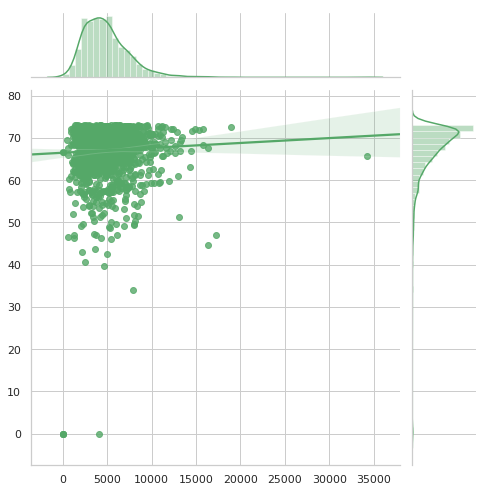

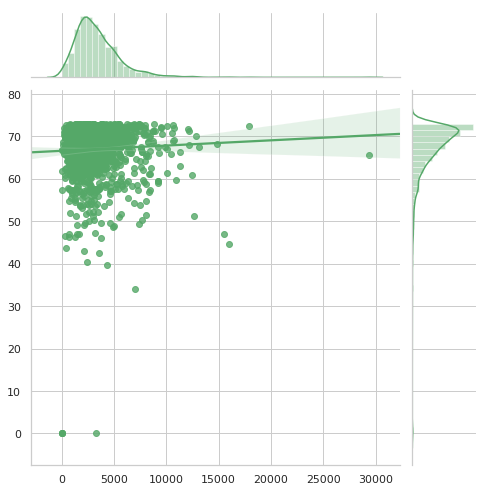

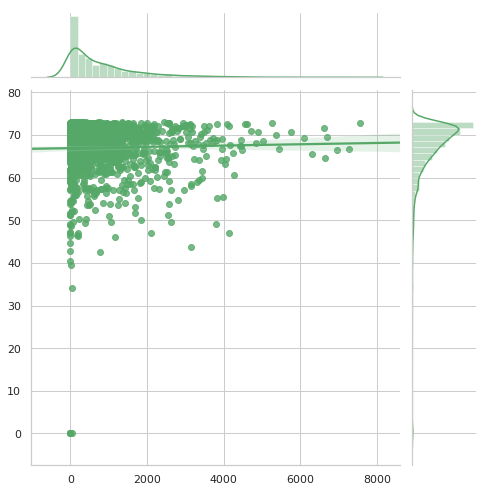

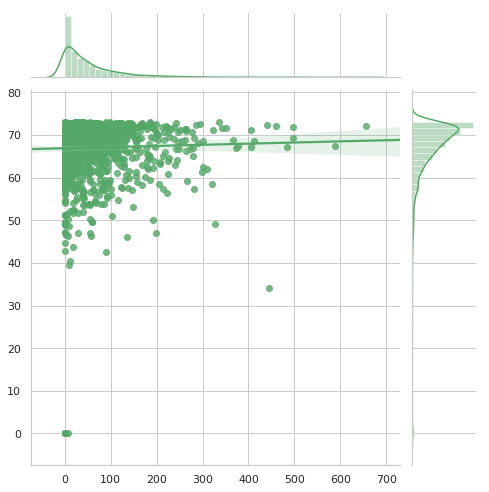

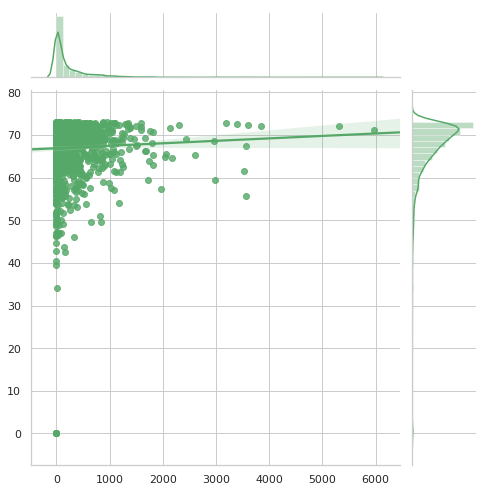

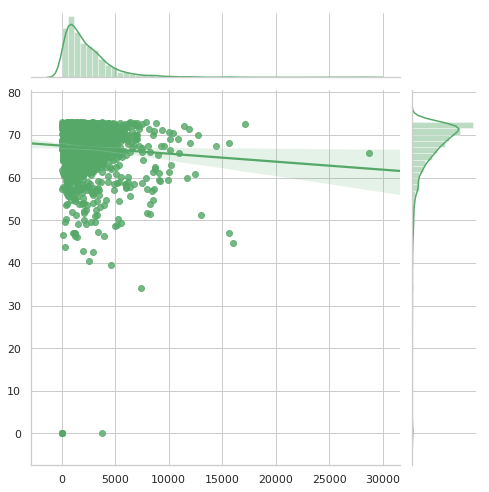

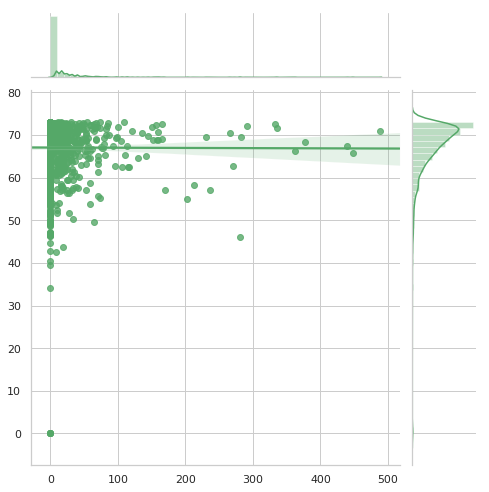

In [4]:
total_pop_ACS17_plot = create_plot(total_pop_ACS17, response_rate_2010)
white_alone_combo_plot = create_plot(white_alone_combo, response_rate_2010)
black_alone_combo_plot = create_plot(black_alone_combo, response_rate_2010)
american_indian_alone_combo_plot = create_plot(american_indian_alone_combo, response_rate_2010)
asian_alone_combo_plot = create_plot(asian_alone_combo, response_rate_2010)
hispanic_latino_plot = create_plot(hispanic_latino, response_rate_2010)
native_hawaiian_alone_combo_plot = create_plot(native_hawaiian_alone_combo, response_rate_2010)

##**Replication and Validation**
The accuracy of the graphs above was in question, so an attempt to replicate and validate the data source in STATA occured. The TX excel file was imported into STATA using the "import" command, then used the "summarize", "correlate", "regress", and "scatter" commands to compare the independent and dependent variables. The non-HTC tracts were again filtered out, matching the number of observations (i.e., tracts classified as hard to count communities) in the Python code. 

The STATA commands used are notated in the code box below as "notes."

In [0]:
#import STATA command
#import excel "/Users/mjb2578/Desktop/pdb2015tract_2010MRR_2017ACS_TX.xlsx", sheet("pdb2015tract_2010data_ACS17_TX") cellrange(A6:BW5259) firstrow
#note: command has file location as “desktop” due to usage of LBJ school computers for STATA; file would be located in “/Users/mirandabadgett/Desktop/grad school/UT/192/PA 397C/final_project/data/pdb2015tract_2010MRR_2017ACS_TX.xlsx” on personal computer

#summarize STATA command
#corr MRR2010 WhiteAloneOrCombo BlackAloneOrCombo AmerIndAloneorCombo AsianAloneOrCombo Hispanic NatHawAloneOrCombo if MRR2010<=73

#correlate STATA command
#corr MRR2010 WhiteAloneOrCombo BlackAloneOrCombo AmerIndAloneorCombo AsianAloneOrCombo Hispanic NatHawAloneOrCombo if MRR2010<=73

#regress STATA command
#regress MRR2010 WhiteAloneOrCombo BlackAloneOrCombo AmerIndAloneorCombo AsianAloneOrCombo Hispanic NatHawAloneOrCombo if MRR2010<=73

##**Limitations**  
>-  Bias in Census Data Collection  
>> - The Census is subject to nonresponse and sample bias  representation when attempting to find trends and information about undercounted communities
>> - Bias also exists in the structure of questions, particularly with those that are socially constructed

>- Challenge of Validating Census Data  
>>- The ACS population estimates are in fact based on estimates, which leaves room for a margin of error that will need to be accounted for.  

>- Challenge of Replicating Census Data  
>>- The Census Bureau site had a lot of broken web links, which made accessing data challenging. They also will be moving data from American FactFinder to a new webpage, which will result in more issues finding datasets that have been hyperlinked.  


##**Conclusion**
Question: What relationship (i.e., correlation) do demographic factors (e.g., race, ethnicity) have to 2010 Census response rates in Hard To Count Communities?  

Answer: The variables for race and ethnicity did not appear to be significant when compared to response rate in STATA. Additionally, the only variables that appeared to show a correlation with response rate where for respondents who were white alone or a combination or Latinx (i.e., Hispanic or Latino).  